In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# 文件路径
root = r'D:\MD_file\Corning\march\laso4\results'
file_path = os.path.join(root,'d0cry_1000p.lmp')
# 
start_frame= 0
step_frame= 1
end_frame=180

In [12]:
# 每一个原子的信息
class Atom:
    def __init__(self, id0, type0, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total):
        self.id = id0
        self.type = type0
        self.x = x
        self.y = y
        self.z = z
        self.q = q
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.fx = fx
        self.fy = fy
        self.fz = fz
        self.c_ke_atom = c_ke_atom
        self.c_pe_atom = c_pe_atom
        self.v_e_total = v_e_total
    def out_info(self):
        print(f'id:{int(self.id)}, type:{self.type}, x:{self.x}, y:{self.y}, z:{self.z}, q:{self.q}')
        print(f'vx:{self.vx}, vy:{self.vy}, vz:{self.vz}, fx:{self.fx}, fy:{self.fy}, fz:{self.fz}')
        print(f'E_total:{self.v_e_total}, E_kinetic:{self.c_ke_atom}, E_potential:{self.c_pe_atom}')

In [14]:
# 所有信息储存的总列表
list_all_frames = []
x_min,x_max,y_min,y_max,z_min,z_max = None,None,None, None,None,None
box_size = [None, None, None]
num_atom = None
len_per_frame = None
# 第一次打开,是看一下基本数据：
with open(file_path,'r') as f_open:
    # 前三行都不要
    for i in range(3): 
        f_open.readline()
    # 第四行是Number
    num_atom = int(f_open.readline())
    # 定义一页的行数
    len_per_frame = num_atom + 9  
    # 第五行不要
    f_open.readline()
    # 存储range范围
    temp_range_list = []
    for i in range(3): 
        temp_min,temp_max,a = f_open.readline().split()
        temp_range_list.append(temp_min)
        temp_range_list.append(temp_max)
    # 将字符串转换为浮点数并直接赋值给变量
    x_min, x_max, y_min, y_max, z_min, z_max = [float(i) for i in temp_range_list]
print(f'Num of atom: {num_atom}')
print(f'X range: {x_min}  {x_max}')
print(f'Y range: {y_min}  {y_max}')
print(f'Z range: {z_min}  {z_max}\n')

# 开始读取文件
f_open = open(file_path,'r')
# 记录当前行数
count_row = 0
for i_frame in range(start_frame, end_frame, step_frame):
    if i_frame%50==0:
        print(f'Now is reading frame {i_frame}')
    list_frame = []
    # 先判断下是不是我要的这页
    now_frame_count = len_per_frame*i_frame
    # 如果不是同一页，则跳过这一页,再继续空读
    while count_row!=now_frame_count:
        # print(f'Now:{now_frame_count}  count:{count_row}')
        count_row+=len_per_frame
        for i in range(len_per_frame):
            f_open.readline()
    # 如果是同一页，那么就开始读取数据
    else:
        # print(f'Now:{now_frame_count}  count:{count_row}')
        # 首先就是跳过表头的9行
        for i in range(9):
            f_open.readline()
        # 再读取其余的数据
        for j_row in range(num_atom):
            temp_data = f_open.readline().split()
            id0, type0, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total = [float(i) for i in temp_data]
            #print(id0, type0, q, x, y, z)
            temp_atom = Atom(id0, str(int(type0)), q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total)
            list_frame.append(temp_atom)
        # 这一页读取完毕了
        list_all_frames.append(list_frame)
        count_row+=len_per_frame
     
# 关闭文件
f_open.close()

Num of atom: 6097
X range: 0.35520303752146276  119.64479696248327
Y range: 0.17760151876073138  59.822398481241635
Z range: 0.033744288564613534  11.366255711436295

Now is reading frame 0
Now is reading frame 50
Now is reading frame 100
Now is reading frame 150


In [15]:
out_path = r'D:\MD_file\date\0317-corning\old-box\out_xyz.txt'

In [16]:
list_all_frames[5][10].out_info()

id:4404, type:3, x:3.28501, y:1.10228, z:4.11269, q:0.6
vx:-7.29181, vy:-38.4071, vz:3.60231, fx:0.485498, fy:-0.0439312, fz:-0.202881
E_total:-1.4183, E_kinetic:0.554377, E_potential:-1.97268


# 生成xyz格式文件
import os
out_xyz=0
if out_xyz == 1:
    # 若文件存在则删除
    if os.path.exists(out_path):
        os.remove(out_path)
    # 打开文件，以追加模式打开
    with open(out_path, 'w') as file:
        for i in list_all_frames:
            file.write('4011\n')
            file.write('Atoms\n')
            # 每一帧当中的代码
            for ii in i:
                file.write(list_type[ii.type-1] +' '+ str(ii.x) + ' '+ str(ii.y)+' '+str(ii.z) +'\n')
    print('output has been completed')

In [19]:
data_copy = list_all_frames.copy()

# 计算区域原子的 MSD

In [21]:
box_size = [x_max-x_min,y_max-y_min,z_max-z_min]
print(box_size)

[119.2895939249618, 59.6447969624809, 11.332511422871683]


# 单个原子能量的变化

In [24]:
# 找打对于ID原子的能量变化
find_id = 1765
one_atom_info = []
for i_frame in data_copy:
    for i_atom in i_frame:
        if i_atom.id ==find_id:
            one_atom_info.append(i_atom)

In [25]:
one_atom_info[0].out_info()
##  c_ke_atom  c_pe_atom  v_e_total

id:1765, type:1, x:60.7689, y:24.7855, z:1.6973, q:-1.2
vx:2.53778, vy:1.93625, vz:-18.7834, fx:1.94629, fy:0.00548808, fz:-2.11377
E_total:-9.59019, E_kinetic:0.300973, E_potential:-9.89117


id:1765, type:1, x:61.4123, y:24.94, z:10.5805, q:-1.2
vx:-1.13928, vy:1.56603, vz:-3.39486, fx:-4.76481, fy:-0.878013, fz:3.83786
E_total:-9.4285, E_kinetic:0.012665, E_potential:-9.44116


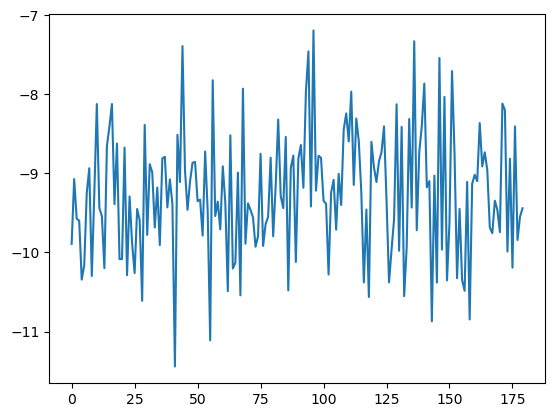

In [26]:
#  c_ke_atom  c_pe_atom  v_e_total
x = range(len(one_atom_info))
y = []
for i in  one_atom_info:
    y.append(i.c_pe_atom)
# 查看最后一个信息
one_atom_info[-1].out_info()
# 画图
plt.plot(x,y)

In [27]:
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

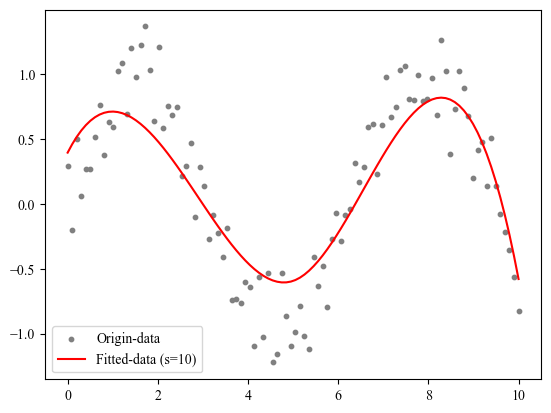

In [28]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# 生成示例数据（含噪声）
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

# 调整平滑参数 s（值越大曲线越平滑）
spline = UnivariateSpline(x, y, s=10)  # 增大s的值，直到满意
y_smooth = spline(x)

# 绘图
plt.scatter(x, y, label='Origin-data', color='gray', s=10)
plt.plot(x, y_smooth, label='Fitted-data (s=10)', color='red')
plt.legend()
plt.show()

# 区域能量的变化

In [30]:
# 找到几个目标区域进行对比
# 43 33 23 13 3
# X range: -0.017790365779219997  84.13728810489656
# Y range: -0.011639435343781201  55.04723943534354
# Z range: -0.002421064982674359  11.450121064982959
x_cen = (x_max-x_min)/2

In [31]:
def is_point_in_circle(center, radius, point):
    """
    判断点是否在圆内或圆上
    :param center: 圆心坐标 (tuple/list) 格式: (x, y)
    :param radius: 圆的半径 (非负数)
    :param point: 待判断点坐标 (tuple/list) 格式: (x, y)
    :return: bool (True表示在圆内或圆上，False表示在圆外)
    """
    # 计算坐标差值
    dx = point[0] - center[0]
    dy = point[1] - center[1]
    
    # 计算距离平方（避免开平方运算）
    distance_squared = dx ** 2 + dy ** 2
    
    # 与半径平方比较
    return distance_squared <= radius ** 2

# 筛选区域原子 

In [33]:
# 设置中心区域
x_cen,y_cen =  15, 44.5
dis_r = 5.0
########  
region_atom = []
for i_frame in data_copy:
    temp_list = []
    for i_atom in i_frame:
        if is_point_in_circle([x_cen,y_cen],dis_r,[i_atom.x,i_atom.y]):
            temp_list.append(i_atom)
    region_atom.append(temp_list)


In [47]:
region_atom[0][0].out_info()

id:3701, type:2, x:12.9078, y:40.9655, z:6.07939, q:1.8
vx:13.5405, vy:-12.3458, vz:-20.5138, fx:-1.46312, fy:1.30639, fz:0.743307
E_total:-16.0953, E_kinetic:1.05786, E_potential:-17.1532


In [104]:
# 然后计算这个区域的均值
#  c_ke_atom  c_pe_atom  v_e_total
out_data = []
num_list = []
for i_frame in  region_atom:
    temp_num = len(i_frame)
    out_sum = 0
    for i_atom in i_frame:
        out_sum += i_atom.q
    # Sum
    out_sum=out_sum/temp_num
    out_data.append(out_sum)
    
    num_list.append(temp_num)

In [106]:
import pandas as pd
import numpy as np

def calculate_rolling_std(x, y, window_size):
    """
    计算滚动窗口标准差，表征每个位置的波动幅度
    
    参数:
        x (array-like): 位置坐标数组
        y (array-like): 对应的数值数组
        window_size (int): 滚动窗口大小（需为奇数以保证对称性）
    
    返回:
        ndarray: 每个位置的波动评价值（标准差），与输入长度相同
    
    注意:
        - 输入x和y的长度必须一致
        - 窗口边缘位置因数据不足返回NaN
        - 建议窗口大小为奇数以保证窗口对称
    """
    # 输入校验
    if len(x) != len(y):
        raise ValueError("x和y的长度必须相同")
    if window_size <= 0 or not isinstance(window_size, int):
        raise ValueError("window_size必须是正整数")
    if window_size > len(y):
        raise ValueError("window_size不能超过数据长度")
    
    # 转换为Pandas Series并计算滚动标准差
    y_series = pd.Series(y)
    rolling_std = y_series.rolling(
        window=window_size, 
        center=True,        # 居中窗口
        min_periods=1       # 允许最小计算窗口（可根据需求调整）
    ).std()
    
    return rolling_std.to_numpy()  # 返回NumPy数组



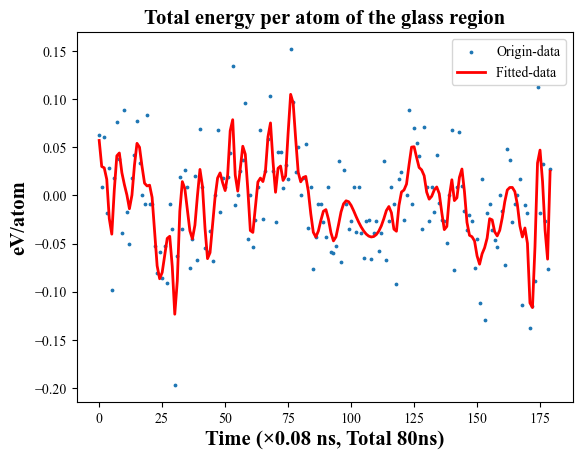

In [124]:
# 拟合数据 

x = range(len(region_atom))
y = out_data
y_mean = sum(y)/len(y)
#yf = (calculate_rolling_std(x, y, window_size)*5+y_mean)
plt.scatter(x,y,s=3,label='Origin-data')
plt.ylabel('eV/atom', fontsize=15,fontweight='bold')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
#plt.plot(x,yf,label='Std',c='r')
# plt.axhline(y_mean,c='r',label='Y-mean')

title = 'Total energy per atom of the glass region'
plt.title(title, fontsize=15, fontweight='bold')
# 调整平滑参数 s（值越大曲线越平滑）
fitted_s = 0.2
spline = UnivariateSpline(x, y, s=fitted_s)  # 增大s的值，直到满意
y_smooth = spline(x)
plt.plot(x, y_smooth, label='Fitted-data ',linewidth=2, color='red')
plt.legend()
plt.show()

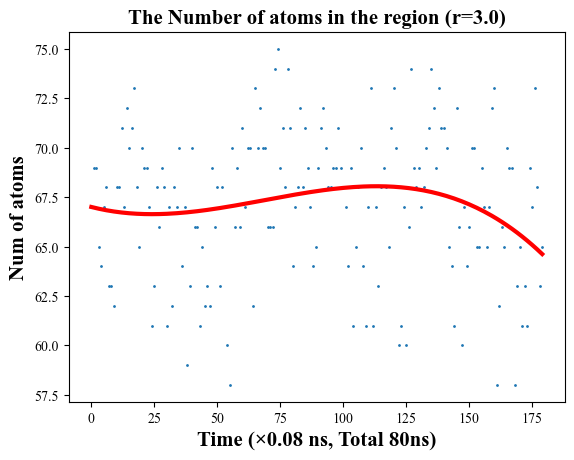

In [56]:
y = num_list
plt.scatter(x,y,s=1)
plt.ylabel('Num of atoms', fontsize=15, fontweight='bold')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
plt.title('The Number of atoms in the region (r=3.0)', fontsize=15, fontweight='bold')
spline = UnivariateSpline(x, y, s=6500)  # 增大s的值，直到满意
y_smooth = spline(x)
plt.plot(x, y_smooth, label='Fitted-data ',linewidth=3, color='red')

In [70]:
# 统计原子的数量
# 按元素种类进行分析
count_type = [[],[],[],[]]

for i_num,i_frame in  enumerate(region_atom):
    temp_num = len(i_frame)
    # 四种原子的数量
    temp_list = [0,0,0,0]
    for i_atom in i_frame:
        temp_type = int(i_atom.type)
        temp_list[temp_type-1]+=1
    for i,i_dat in enumerate(temp_list):
        count_type[i].append(i_dat)

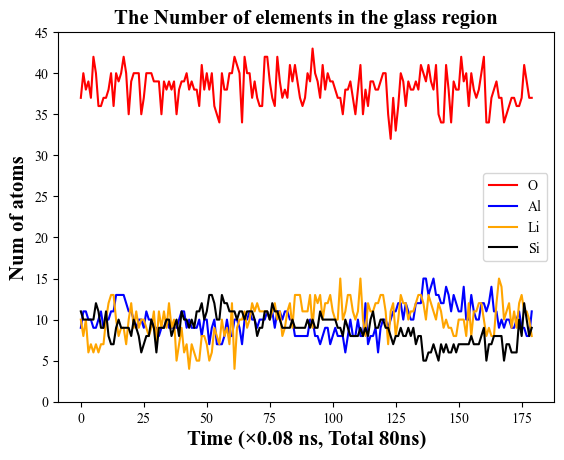

In [102]:
from brokenaxes import brokenaxes

x = range(len(region_atom))
name_type = ['O','Al','Li','Si']
color_type = ['red','blue','orange','black']

for i_num,i_count in enumerate(count_type):
    plt.plot(figuresize=(4,12))
    y = i_count
    #if i_num==0:
      #  continue
    plt.plot(x,y,c=color_type[i_num],label=name_type[i_num])
    #spline = UnivariateSpline(x, y, s=200)  # 增大s的值，直到满意
    #y_smooth = spline(x)
    #plt.plot(x, y_smooth, label='Fitted-data ',linewidth=3, color='red')

plt.legend()
plt.ylabel('Num of atoms', fontsize=15, fontweight='bold')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
plt.title('The Number of elements in the glass region', fontsize=15, fontweight='bold')
plt.ylim(0,45)
plt.show()

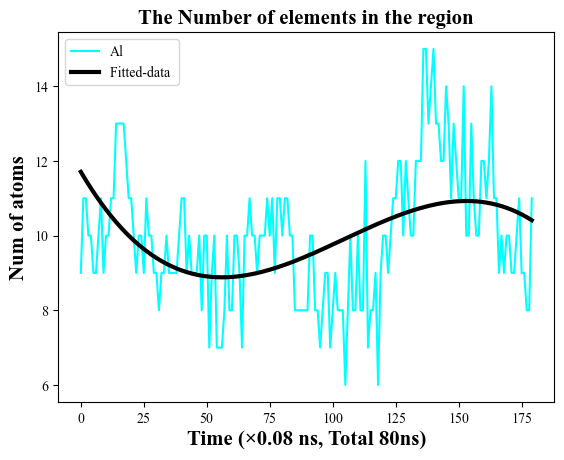

In [63]:
from brokenaxes import brokenaxes
i = 1

x = range(len(region_atom))
y = count_type[i]
name_type = ['O','Al','Li','Si']
color_type = ['red','cyan','orange','green']

plt.plot(x,y,c=color_type[i],label=name_type[i])


plt.ylabel('Num of atoms', fontsize=15, fontweight='bold')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
plt.title('The Number of elements in the region', fontsize=15, fontweight='bold')
##
spline = UnivariateSpline(x, y, s=800)  # 增大s的值，直到满意
y_smooth = spline(x)
plt.plot(x, y_smooth, label='Fitted-data ',linewidth=3, color='black')


plt.legend()
plt.show()

In [175]:
def calculate_density(atom_counts, box_dimensions):
    """
    计算材料区域密度
    参数：
    atom_counts : dict - 元素数量字典，例如 {'Si':5, 'O':2, 'Al':3, 'Li':6}
    box_dimensions : list - 盒子尺寸 [x, y, z] (单位：Å)
    返回：
    密度 (单位：g/cm³)，保留4位小数
    """
    # 原子量数据库 (单位：g/mol)
    atomic_masses = {
        'O': 16.00,
        'Al': 26.98,
        'Li': 6.94,
        'Si': 28.09
    }
    
    # 计算总摩尔质量
    total_molar_mass = sum(
        atomic_masses[element] * count 
        for element, count in atom_counts.items()
    )
    
    # 计算质量（克）
    avogadro = 6.02214076e23  # 阿伏伽德罗常数
    mass_g = total_molar_mass / avogadro
    
    # 计算体积（cm³）
    volume_cm3 = (box_dimensions[0] * box_dimensions[1] * box_dimensions[2]) * 1e-24
    volume_cm3 = np.pi*5**2*box_dimensions[2]* 1e-24
    # 计算密度
    density = mass_g / volume_cm3
    
    return round(density, 4)  # 保留4位小数

In [177]:
count_type[3][0]

11

In [179]:
# 使用示例
if __name__ == "__main__":
    # 测试案例：与之前示例保持一致
    test_counts = {'O':17, 'Al':4, 'Li':7, 'Si':1}
    test_box = [6, 6, z_max-z_min]  # 1000 Å³
    print("示例密度:", calculate_density(test_counts, test_box), "g/cm³")  # 应输出约0.2258

示例密度: 0.8429 g/cm³


In [181]:
density_list = []
for i_frame in range(len(count_type[0])):
    a,b,c,d = count_type[0][i_frame], count_type[1][i_frame], count_type[2][i_frame], count_type[3][i_frame]
    box = [6,6,z_max-z_min]
    test_counts = {'O':a, 'Al':b, 'Li':c, 'Si':d}
    test_box = [6, 6, z_max-z_min] 
    res = calculate_density(test_counts, test_box)
    density_list.append(res)

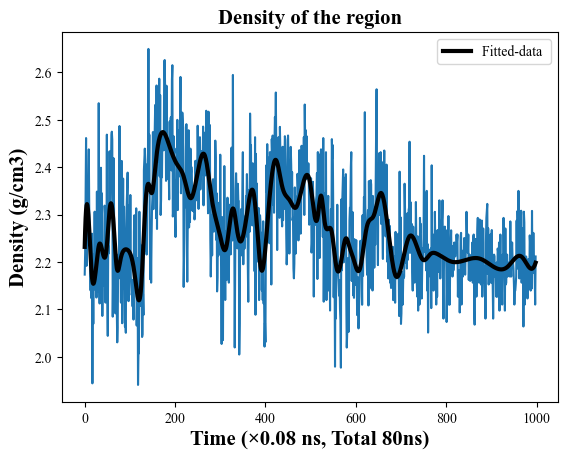

In [191]:
x=range(999)
y=density_list
plt.plot(x,y)
plt.title('Density of the region', fontsize=15, fontweight='bold')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
plt.ylabel('Density (g/cm3)', fontsize=15, fontweight='bold')

##
spline = UnivariateSpline(x, y, s=7.5)  # 增大s的值，直到满意
y_smooth = spline(x)
plt.plot(x, y_smooth, label='Fitted-data ',linewidth=3, color='black')


plt.legend()
plt.show()

# 电负性的判据

In [195]:
charge_list = []
charge = [-1.2,1.8,0.6,2.4]
for i_frame in range(len(count_type[0])):
    a,b,c,d = count_type[0][i_frame], count_type[1][i_frame], count_type[2][i_frame], count_type[3][i_frame]
    test_counts = {'O':a, 'Al':b, 'Li':c, 'Si':d}
    temp_charge = a*charge[0]+b*charge[1]+c*charge[2]+d*charge[3]
    res = temp_charge
    charge_list.append(res)

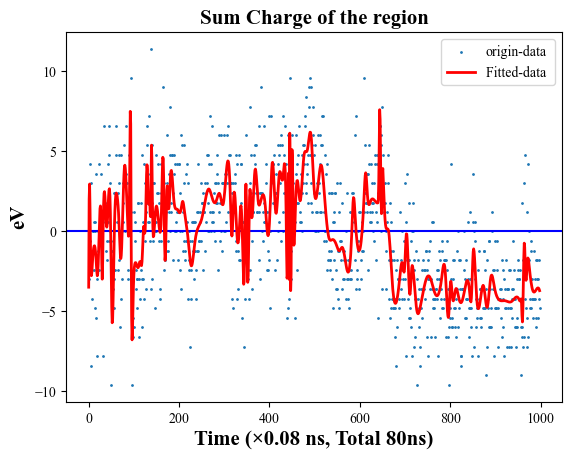

In [233]:
x=range(999)
y=charge_list
plt.scatter(x,y,s=1,label='origin-data')
plt.ylabel('eV', fontsize=15, fontweight='bold')
plt.title('Sum Charge of the region', fontsize=15, fontweight='bold')
plt.axhline(0,color='b')
plt.xlabel('Time (×0.08 ns, Total 80ns)', fontsize=15, fontweight='bold')
##
spline = UnivariateSpline(x, y, s=6000)  # 增大s的值，直到满意
y_smooth = spline(x)
plt.plot(x, y_smooth, label='Fitted-data ',linewidth=2, color='red')

plt.legend()
plt.show()

In [255]:
# 动能变化？
# 然后计算这个区域的均值
#  c_ke_atom  c_pe_atom  v_e_total
#  type 1 O, 2 Al, 3 Li, 4 Si
out_data = []
ana_type = 4
for i_frame in  region_atom:
    temp_num = 0
    out_sum = 0
    for i_atom in i_frame:
        if float(i_atom.type) - ana_type==0:
            out_sum += i_atom.c_ke_atom
            temp_num+=1
    # Sum
    if temp_num==0:
        out_sum=0
    else:
        out_sum=out_sum/temp_num
    out_data.append(out_sum)

Text(0.5, 1.0, 'Ke of Si')

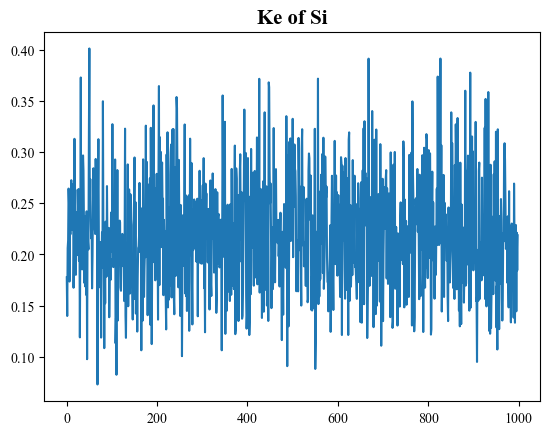

In [257]:
plt.plot(range(999),out_data)
plt.title('Ke of Si', fontsize=15, fontweight='bold')
# plt.axhline(0,color='r')

# 然后分析各种性质的均值

In [32]:
print('Data in list_all_frames')
print('vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total')

Data in list_all_frames
vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total


In [51]:
# type 1 2 3 4
# type O Al Li Si
list_all_frames[0][0].type

'1'

In [36]:

ana_type = '4'

In [38]:
# 分析均值的变化
mean_list = []
for i_frame in list_all_frames:
    sum_list = np.array([0.0,0.0,0.0])
    count_num = 0
    for j_atom in i_frame:
        # 再来个筛选元素种类的
        if j_atom.type ==ana_type:
            temp_list = [j_atom.c_ke_atom,j_atom.c_pe_atom,j_atom.v_e_total]
            temp_list = np.array(temp_list)
            sum_list+=temp_list
            count_num+=1
    sum_list/=count_num
    mean_list.append(sum_list)
mean_list = np.array(mean_list)


In [40]:
len(mean_list)

100

In [42]:
type_dic = {'1':'O','2':'Si','3':'Al','4':'Li'}
type_dic[ana_type]

'Li'

In [44]:
ana_name = ', type:'+ type_dic[ana_type] + ', 10K-cube'

In [46]:
def ana_list(temp_list):
    # 创建示例数组
    data = np.array(temp_list)
    # 计算均值
    mean = np.mean(data)
    # 计算方差
    variance = np.var(data)
    # 计算标准差
    std_deviation = np.std(data)
    # 输出结果
    #print(f"数组: {data}")
    print(f"均值: {round(mean,5)}")
    # print(f"方差: {round(variance,5)}")
    print(f"标准差: {round(std_deviation,5)}")
    return None

均值: 0.22014
标准差: 0.00701


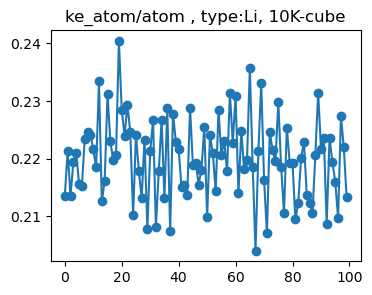

In [48]:
plt.figure(figsize = (4,3))
ana_pro_list = np.array([i[0] for i in mean_list])
plt.plot(range(len(mean_list)),ana_pro_list, marker='o', linestyle='-')
plt.title('ke_atom/atom {}'.format(ana_name))
ana_list(ana_pro_list[2:])

Text(0.5, 1.0, 'pe_atom/atom , type:Li, 10K')

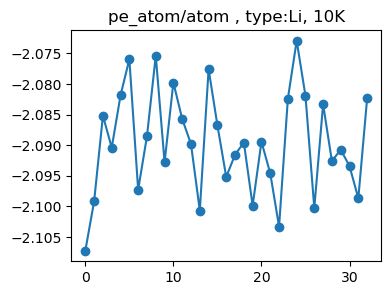

In [16]:
plt.figure(figsize = (4,3))
plt.plot(range(len(mean_list)),[i[1] for i in mean_list], marker='o', linestyle='-')
plt.title('pe_atom/atom {}'.format(ana_name))

Text(0.5, 1.0, 'totalE/atom , type:Li, 10K')

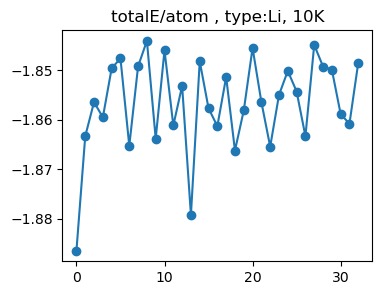

In [17]:
plt.figure(figsize = (4,3))
plt.plot(range(len(mean_list)),[i[2] for i in mean_list], marker='o', linestyle='-')
plt.title('totalE/atom {}'.format(ana_name))

# 分析ke，pe，以及e_total三种能量的分布情况

In [19]:
# 分析数据选项
ana_frame = 0

# 分析类别 1是总能量，2是动能，3是势能
#  11vx, 12vy, 13vz,   21fx, 22fy, 23fz

ana_type_num = 2

# 分析原子的类型
# 此处 O Si Al Li
ana_element_type = ['1']

# 切分份数
x_split_size = 40
y_split_size = 30

In [20]:
# 读取数据，假设x和y分别为x轴和y轴的数据，z为能量数据
list_x = []
list_y = []
list_z = []
list_ana = []
# 分析能量值 pe ke or e_total
if ana_type_num == 1:
    ana_type = 'Total energy'
elif ana_type_num == 2:
    ana_type = 'Knetic energy'
elif ana_type_num == 3:
    ana_type = 'Potential energy'
elif ana_type_num == 11:
    ana_type = 'Velocity_x'
elif ana_type_num == 12:
    ana_type = 'Velocity_y'
elif ana_type_num ==13:
    ana_type = 'Velocity_z'
elif ana_type_num == 21:
    ana_type = 'Acceleration_x'
elif ana_type_num == 22:
    ana_type = 'Acceleration_y'
elif ana_type_num == 23:
    ana_type = 'Acceleration_z'
    
    
# 此处并不是把每一帧的数据都放进去，而是选择某一帧进行分析
i = list_all_frames[ana_frame]
for ii in i:
    # 先筛选元素
    if str(ii.type) in ana_element_type:   
        list_x.append(ii.x)    
        list_y.append(ii.y)
        list_z.append(ii.z)
        # 再筛选类型 
        if ana_type_num == 1:
            list_ana.append(ii.v_e_total)
        elif ana_type_num==2:
            list_ana.append(ii.c_ke_atom)
            #print(ii.c_ke_atom)
        elif ana_element_type==3:
            list_ana.append(ii.c_pe_atom)
        elif ana_type_num ==21:
            list_ana.append(ii.fx)
        elif ana_type_num==22:
            list_ana.append(ii.fy)
        elif ana_type_num==23:
            list_ana.append(ii.fz)
        elif ana_type_num==11:
            list_ana.append(ii.vx)
        elif ana_type_num==12:
            list_ana.append(ii.vy)
        elif ana_type_num==13:
            list_ana.append(ii.vz)
        else:
            print('Input Error!')

In [21]:
len(list_all_frames)

33

C:\Users\81004\AppData\Local\Temp\ipykernel_13880\2620049084.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")
C:\Users\81004\AppData\Local\Temp\ipykernel_13880\2620049084.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")


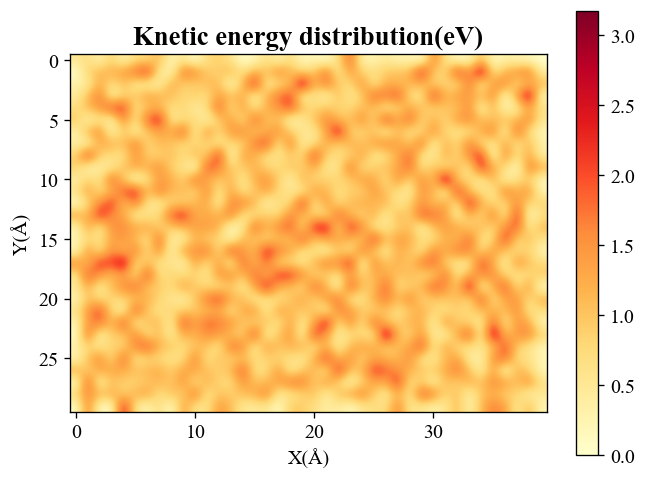

Analysis frame: 0
Analysis type: Knetic energy  Total energy: 1251.697480333


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.colors as mcolors
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 创建绘图窗口
fig = plt.figure(dpi=120)

# 将x，y，energy转化为numpy数组
x = np.array(list_x)
y = np.array(list_y)

# 辨别分析的能量类型
energy  = np.array(list_ana)

# 设置xy网格
x_grid = np.linspace(x.min(), x.max(), x_split_size)
y_grid = np.linspace(y.min(), y.max(), y_split_size)
X, Y = np.meshgrid(x_grid, y_grid)

# 计算每个网格上的总能量
total_energy = np.zeros_like(X)
for i in range(len(x)):
    # 找到x，y所在的网格
    x_idx = np.abs(x_grid - x[i]).argmin()
    y_idx = np.abs(y_grid - y[i]).argmin()
    # 将能量加到所在网格上
    total_energy[y_idx, x_idx] += energy[i]

plt.xlabel('X(Å)', fontproperties=font, fontsize=12)
plt.ylabel('Y(Å)', fontproperties=font, fontsize=12)

# 定义颜色映射，红色表示较小值，蓝色表示较大值
# 设置字体
font = {'family': 'Times New Roman',
        'weight': 'bold',
        'size': 12}

# 设置图像的分辨率为300像素/英寸
plt.rcParams['figure.dpi'] = 150


# 定义颜色映射，红色表示较小值，蓝色表示较大值
cmap = plt.cm.get_cmap("YlOrRd")

# 定义颜色边界
bounds = np.linspace(0, 5, 6)
# norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 绘制热力图
cmap = plt.cm.get_cmap("YlOrRd")
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# 绘制能量分布图
# plt.pcolormesh(X, Y, total_energy,cmap= 'RdYlBu_r')
# 绘制热力图
plt.imshow(total_energy, cmap=cmap,interpolation='bicubic')

plt.colorbar()
title_name = ana_type + ' distribution(eV)'

plt.title(title_name,fontproperties=font, fontsize=16)

#
plt.show()

# 计算总能量
print('Analysis frame:',str(ana_frame))
total_energy_sum = np.sum(total_energy)
print('Analysis type:',ana_type,' Total energy:',total_energy_sum)

# 统计晶体区域和非晶区域的能量差别

In [24]:
ana_num =  1600

c_x1,c_x2 = 35,60
g_x1,g_x2 = 0,110
# 分析元素类型
# 1O  2Nb   3Li
sts_element = 3
# 分析能量类型
# 1e  2pe    3ke
sts_type = 1

In [25]:
# 统计两个区域原子的信息
list_location = list_all_frames[ana_num]
list_glass_e = []
list_cry_e = []
list_glass_x,list_cry_x = [],[]
for i in list_location:
    # 晶体区域
    if c_x1<i.x<c_x2 and i.type== sts_element:
        list_cry_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_cry_x.append(i.x)
    if g_x1 <i.x< g_x2 and i.type==sts_element:
        list_glass_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_glass_x.append(i.x)

IndexError: list index out of range

In [ ]:
# 筛选出需要分析的能量类型
sts_titleName = 'None'
sts_glass_e,sts_cry_e =[],[]
# 补足画图所用的横坐标
glass_x,cry_x = [],[]
ii = 0
for i in list_glass_e:
    glass_x.append(ii)
    ii+=1
    if sts_type == 1:
        sts_titleName = "Total Energy"
        sts_glass_e.append(i[0])
    elif sts_type == 2:
        sts_titleName = "Potential Energy"
        sts_glass_e.append(i[1])
    elif sts_type == 3:
        sts_titleName = "Knetic Energy"
        sts_glass_e.append(i[2])
# 再统计
jj = 0
for i in list_cry_e:
    cry_x.append(jj)
    jj+=1
    if sts_type == 1:
        sts_cry_e.append(i[0])
    elif sts_type == 2:
        sts_cry_e.append(i[1])
    elif sts_type == 3:
        sts_cry_e.append(i[2])

In [ ]:
import statistics
ana_element_name = 'Nb'
if sts_element==1:
    ana_element_name ='O'
elif sts_element==3:
    ana_element_name ='Li'

# 
print('Element: ',ana_element_name,' Ana_frame: ',ana_num)

plt.figure(dpi=120)
# 玻璃区域

plt.scatter(list_glass_x,sts_glass_e, c='r',s=2,label= 'glass')
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_glass_e), color='red', linestyle='--',label='glass Emean')
plt.xlabel('X (Å)')
plt.ylabel('Energy (eV)')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_glass_e), color='red', linestyle='-.',label='glass Emedian')

# 晶体区域
plt.scatter(list_cry_x, sts_cry_e, c='b',s=2,label="crtsyal")
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_cry_e), color='b', linestyle='-.',label='crystal Emean')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_cry_e), color='b', linestyle='--',label='cry Emedian')
plt.title(sts_titleName)
plt.legend()
plt.show()

# 要分析沿x方向的能量分布

In [ ]:
# 菜单栏
start_frame = 0
step_frame = 500
end_frame = 2001
# 将要分析的元素
xd_ana_element = 2
# 分析能量类型 1e 2pe 3ke 4密度或者说原子数
xd_ana_type = 1
# 精度 每隔多远设为同一格
delta = 1

In [ ]:
import math
# 多个帧数的数据总集合
x_direction_all_list = []
# 计数有多少个帧数
count = 0
frame_list = []
count_list = []
for frame in range(start_frame,end_frame,step_frame):
    count += 1
    xd_max_x = float('-inf')
    # 取出当前帧
    xd_all_atom_list = list_all_frames[frame]
    xd_ana_atom =[]
    # 筛选数据     
    for i in xd_all_atom_list:
        if i.x>xd_max_x:
            xd_max_x = i.x
        # 记录当下这个原子的能量
        energy_temp = 0
        if i.type == xd_ana_element:
            if xd_ana_type == 1:
                energy_temp = i.v_e_total
            elif xd_ana_type == 2:
                energy_temp = i.c_pe_atom
            elif xd_ana_type == 3:
                energy_temp =i.c_ke_atom
            xd_ana_atom.append([i.type, i.x, energy_temp])
            #elif xd_ana_type == 4:
                # 来个数量计数
               # energy_temp.append(1)
            
    
    # 根据x位置计算点的能量
    interval_num = math.floor(xd_max_x/delta)
    xd_e_list = np.zeros(interval_num)
    xd_count = np.zeros(interval_num)
    xd_e_list_x = []
    for i in xd_ana_atom :
        if i[1]< delta* interval_num:   
            pos = math.floor(i[1]/delta)
            xd_e_list[pos]+= i[2]
            xd_count[pos]+=1
    # 最后求均值
    for i in range(len(xd_e_list)):
        xd_e_list_x.append(i)
        if xd_count[i]!=0:
            xd_e_list[i] = xd_e_list[i]/xd_count[i] 
    # print(len(xd_e_list_x),len(xd_e_list))
    x_direction_all_list.append([xd_e_list_x, xd_e_list])
    
    frame_list.append(frame)
    count_list.append(xd_count)

# if xd_ana_type == 4:
#     print('Frame: ',frame_list)
#     x_direction_all_list=count_list
#     xd_x = [0 + i * 1 for i in range(len(x_direction_all_list[0]))]
#     color = ['r','orange','green','blue','purple','r','orange','green','blue','purple','r','green','blue','purple']
#     fig, axes = plt.subplots(len(x_direction_all_list), 1, figsize=(5, 6))
#     for i in range(len(x_direction_all_list)):
#         axes[i].plot(xd_x, x_direction_all_list[i],c=color[i])
#         if i!=len(x_direction_all_list)-1:
#             axes[i].set_xticklabels([])
#         axes[i].set_xlim(0,len(x_direction_all_list[0]))
#         axes[i].set_ylim(180,220)

In [ ]:
print('Frame: ',frame_list)
# 
color = ['r','orange','green','blue','purple','r','orange','green','blue','purple','r','green','blue','purple']
# 创建子图
fig, axes = plt.subplots(len(x_direction_all_list), 1, figsize=(5, 6))

for i in range(len(x_direction_all_list)):
    axes[i].plot(x_direction_all_list[i][0], x_direction_all_list[i][1],c=color[i])
    if i!=len(x_direction_all_list)-1:
        axes[i].set_xticklabels([])
    axes[i].set_xlim(0,len(x_direction_all_list[0][0]))
    #axes[i].set_ylim(-45.5,-41)

In [ ]:
# 输出单帧中原子数类型以及数量
type_1,type_2,type_3 = 0,0,0
Nb_ke,O_ke,Li_ke = 0,0,0
for atom in list_all_frames[0]:
    if atom.type==1:
        O_ke = atom.c_ke_atom
        type_1+=1
    elif atom.type==2:
        Nb_ke = atom.c_ke_atom
        type_2+=1
    elif atom.type==3:
        Li_ke = atom.c_ke_atom
        type_3+=1
print('Num_O:',type_1,' num_Nb: ',type_2,' num_Li: ',type_3)
print('Ke_O:',O_ke,' Ke_Nb: ',Nb_ke,' Ke_Li: ',Li_ke)

# 算一下离子能量下降随时间变化的曲线

In [ ]:
# 步数
start_frame = 0
step_frame = 1
end_frame = 2001
# 将要分析的元素
xd_ana_element = 2
# 分析能量类型 1e 2pe 3ke 4密度或者说原子数 此处只关注total e
xd_ana_type = 1

In [ ]:
#  原子数
num_atom = 0
sum_energy2 = []

sum_energy_x = []
for frame in range(start_frame,end_frame,step_frame):
    # 一帧的数据
    frame_list = list_all_frames[frame]
    sum_energy_x.append(frame)
    # 单帧的能量总值
    frame_energy = 0
    for atom in frame_list:
        if atom.type == xd_ana_element:
            frame_energy += atom.v_e_total
    sum_energy2.append(frame_energy) 


plt.title('The change in O total energy over timesteps')
plt.plot(sum_energy_x, sum_energy2 ,color='blue')

In [ ]:
plt.figure(figsize=(15,5))
plt.title('The change in Nb total energy over timesteps')
plt.plot(sum_energy_x, sum_energy2 ,color='blue')

In [ ]:
# 计算

In [ ]:
import math
xd_ana_num = 0
# 单帧元素列表
xd_all_atom_list = list_all_frames[xd_ana_num]
# 筛选出需要分析的能量类型
xd_titleName = 'None'
xd_ana_atom =[]

# 画图
if xd_ana_type == 1:
    xd_titleName = "Total Energy"
elif xd_ana_type == 2:
    xd_titleName = "Potential Energy"
elif xd_ana_type == 3:
    xd_titleName = "Knetic Energy"
    
# 筛选数据     
for i in xd_all_atom_list:
    if i.x>xd_max_x:
        xd_max_x = i.x
    energy_temp = 0
    if i.type == xd_ana_element:
        if xd_ana_type == 1:
            energy_temp = i.v_e_total
        elif xd_ana_type == 2:
            energy_temp = i.c_pe_atom
        elif xd_ana_type == 3:
            energy_temp =i.c_ke_atom
        xd_ana_atom.append([i.type, i.x, energy_temp])

In [ ]:
# 根据x位置计算点的能量
interval_num = math.floor(xd_max_x/delta)
xd_e_list = np.zeros(interval_num)
xd_count = np.zeros(interval_num)
xd_e_list_x = []
for i in xd_ana_atom :
    if i[1]< delta* interval_num:   
        pos = math.floor(i[1]/delta)
        xd_e_list[pos]+= i[2]
        xd_count[pos]+=1
        
        
# 最后求均值
for i in range(len(xd_e_list)):
    xd_e_list_x.append(i)
    if xd_count[i]!=0:
        xd_e_list[i] = xd_e_list[i]/xd_count[i] 


In [ ]:
len(x_direction_all_list[4:])

In [ ]:
plt.plot(xd_e_list_x,xd_e_list)
plt.xlim(0,105)

In [ ]:
import numpy as np

# 原子的xyz坐标数据
coordinates = np.array([[1.0, 2.0, 3.0],
                       [2.0, 3.0, 4.0],
                       [3.0, 4.0, 5.0],
                       [4.0, 5.0, 6.0],
                       [5.0, 6.0, 7.0]])

# 对应的能量分布
energies = np.array([10.0, 15.0, 20.0, 25.0, 30.0])

# 定义每隔1.0距离的空间的起始位置和结束位置
start = coordinates[:, 0].min()
end = coordinates[:, 0].max()
step = 1.0

# 计算空间区间数量
num_intervals = int((end - start) / step) + 1

# 初始化空间区间的能量和计数
energy_sum = np.zeros(num_intervals)
count = np.zeros(num_intervals)

# 遍历原子坐标和能量，将能量分布累加到相应的空间区间
for coord, energy in zip(coordinates, energies):
    interval_index = int((coord[0] - start) // step)
    energy_sum[interval_index] += energy
    count[interval_index] += 1

# 计算平均能量分布
average_energies = np.divide(energy_sum, count, out=np.zeros_like(energy_sum), where=count != 0)

# 打印平均能量分布
print(average_energies)


# 定量分析

In [ ]:
print("数据详情")
print("晶体区域能量分析 极大值: ",max(sts_cry_e)," 极小值: ",min(sts_cry_e)," 均值: ",round(statistics.mean(sts_cry_e),3)," 中位数:",statistics.median(sts_cry_e))
print("玻璃区域能量分析 极大值: ",max(sts_cry_e)," 极小值: ",min(sts_glass_e)," 均值: ",round(statistics.mean(sts_glass_e),3)," 中位数:",statistics.median(sts_glass_e))
print("对比分析")
print("均值差异:",statistics.mean(sts_glass_e)-statistics.mean(sts_cry_e))
print("中位数差异:",statistics.median(sts_glass_e)-statistics.median(sts_cry_e))


In [ ]:
import pandas as pd


df1 = pd.DataFrame(list_cry_e)
# 使用describe()函数计算统计量
statistics1 = df1.describe()

df2 = pd.DataFrame(list_glass_e)
# 使用describe()函数计算统计量
statistics2 = df2.describe()

print('cry_total_e:\n',statistics1)

print('glass_total_e:\n',statistics2)

In [ ]:
# 计算晶体区域和非晶区域的能量差别
e_cry = 0
count_cry_atom = 0

g_count_ele = {'1':0,'2':0, '3':0}
c_count_ele = {'1':0,'2':0, '3':0}

g_e_dic = {'Nb_total_e':0 ,'Nb_ave_e':0 ,'Nb_all_Ke':0 ,'Nb_ave_ke':0  ,'Nb_all_pe':0  ,'Nb_ave_pe':0,
           'Li_total_e':0 ,'Li_ave_e':0 ,'Li_all_Ke':0 ,'Li_ave_ke':0  ,'Li_all_pe':0  ,'Li_ave_pe':0,
           'O_total_e':0  ,'O_ave_e':0  ,'O_all_Ke':0  ,'O_ave_ke':0    ,'O_all_pe':0  ,'O_ave_pe':0}

c_e_dic = {'Nb_total_e':0,'Nb_ave_e':0,'Nb_all_Ke':0,'Nb_ave_ke':0,'Nb_all_pe':0,'Nb_ave_pe':0,
           'Li_total_e':0, 'Li_ave_e':0,'Li_all_Ke':0,'Li_ave_ke':0,'Li_all_pe':0,'Li_ave_pe':0,
           'O_total_e':0,'O_ave_e':0,'O_all_Ke':0,'O_ave_ke':0,'O_all_pe':0,'O_ave_pe':0}
# 
e_glass = 0
count_glass_atom = 0

cal_list = list_all_frames[ana_num]

# 计算区域的总能量
for i in cal_list:
    # cry 50-60
    if c_x1<i.x<c_x2:
        count_cry_atom+=1
        e_cry+=i.v_e_total
        
        if i.type == 1:
            c_count_ele['1']+=1
            c_e_dic['O_total_e'] += i.v_e_total
            c_e_dic['O_all_Ke'] += i.c_ke_atom
            c_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            c_count_ele['2']+=1
            c_e_dic['Nb_total_e'] += i.v_e_total
            c_e_dic['Nb_all_Ke'] += i.c_ke_atom
            c_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            c_count_ele['3']+=1
            c_e_dic['Li_total_e'] += i.v_e_total
            c_e_dic['Li_all_Ke'] += i.c_ke_atom
            c_e_dic['Li_all_pe'] += i.c_pe_atom
            
    elif g_x1 <i.x< g_x2:
        count_glass_atom+=1
        e_glass+=i.v_e_total
        
        if i.type == 1:
            g_count_ele['1']+=1
            g_e_dic['O_total_e'] += i.v_e_total
            g_e_dic['O_all_Ke'] += i.c_ke_atom
            g_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            g_count_ele['2']+=1
            g_e_dic['Nb_total_e'] += i.v_e_total
            g_e_dic['Nb_all_Ke'] += i.c_ke_atom
            g_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            g_count_ele['3']+=1
            g_e_dic['Li_total_e'] += i.v_e_total
            g_e_dic['Li_all_Ke'] += i.c_ke_atom
            g_e_dic['Li_all_pe'] += i.c_pe_atom
            
print('分析第',ana_num,'帧')        
print('晶体中所有元素的平均总能量：',e_cry/count_cry_atom,' 玻璃中所有元素的平均总能量：',e_glass/count_glass_atom)
print('等体积中晶体和玻璃的原子数量:')
print('晶体：',count_cry_atom,' 玻璃：',count_glass_atom)
print('晶体中原子数分布 ','Nb:',c_count_ele['2'],' O:',c_count_ele['1'],' Li: ',c_count_ele['3'])
print('玻璃中原子数分布 ','Nb:',g_count_ele['2'],' O:',g_count_ele['1'],' Li: ',g_count_ele['3'],'\n')
print('晶体中不同元素的能量对比','Nb原子平均总能:',c_e_dic['Nb_total_e']/c_count_ele['2'],' Nb原子平均动能：',c_e_dic['Nb_all_Ke']/c_count_ele['2'],' Nb原子平均势能：',c_e_dic['Nb_all_pe']/c_count_ele['2'])
print('玻璃中不同元素的能量对比','Nb原子平均总能:',g_e_dic['Nb_total_e']/g_count_ele['2'],' Nb原子平均动能：',g_e_dic['Nb_all_Ke']/g_count_ele['2'],' Nb原子平均势能：',g_e_dic['Nb_all_pe']/g_count_ele['2'],)
print(' ')
print('晶体中不同元素的能量对比','O原子平均总能:',c_e_dic['O_total_e']/c_count_ele['1'],' O原子平均动能：',c_e_dic['O_all_Ke']/c_count_ele['1'],' O原子平均势能：',c_e_dic['O_all_pe']/c_count_ele['1'])
print('玻璃中不同元素的能量对比','O原子平均总能:',g_e_dic['O_total_e']/g_count_ele['1'],' O原子平均动能：',g_e_dic['O_all_Ke']/g_count_ele['1'],' O原子平均势能：',g_e_dic['O_all_pe']/g_count_ele['1'])
print(' ')
print('晶体中不同元素的能量对比','Li原子平均总能:',c_e_dic['Li_total_e']/c_count_ele['3'],' Li原子平均动能：',c_e_dic['Li_all_Ke']/c_count_ele['3'],' Li原子平均势能：',c_e_dic['Li_all_pe']/c_count_ele['3'])
print('玻璃中不同元素的能量对比','Li原子平均总能:',g_e_dic['Li_total_e']/g_count_ele['3'],' Li原子平均动能：',g_e_dic['Li_all_Ke']/g_count_ele['3'],' Li原子平均势能：',g_e_dic['Li_all_pe']/g_count_ele['3'])




# 分析单个粒子的能量变化

In [ ]:
# 分析原子id（类型用来检查）
ana_element_index = 11653
ana_element_index_type = 3
# 分析起始位置和步长
start_frame_ana_e = 0
end_frame_ana_e = 2000
step_frame_ana_e = 20
# 分析类型有 1e  2pe  3ke
ana_energy_type = 1

In [ ]:
# 记录粒子的时间和能量的列表
single_energy_list_e_y = []
single_energy_list_time_x = []
for i_e in range(start_frame_ana_e,end_frame_ana_e,step_frame_ana_e):
    # 取出一帧
    list_temp = list_all_frames[i_e]
    # 找到关注的原子
    for ii_e in list_temp:
        if ii_e.id == ana_element_index:
            # list[e,pe,ke]
            single_energy_list_e_y.append([ii_e.v_e_total,ii_e.c_pe_atom,ii_e.c_ke_atom])
            single_energy_list_time_x.append(i_e)

In [ ]:
list_e,list_pe,list_ke = [],[],[]
for i in single_energy_list_e_y:
    list_e.append(i[0])
    list_pe.append(i[1])
    list_ke.append(i[2])

In [ ]:
# 分析类型有 1e  2pe  3ke
ana_energy_type = 3
# 画图
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 设置字体加粗
font.set_weight('bold')
font.set_size(12)
# 创建绘图窗口
# 创建绘图窗口
# 根据分析类型加上名称
if ana_energy_type == 1:
    title_name1 = 'Total Energy'
    list_y_temp = list_e 
elif ana_energy_type == 2:
    title_name1 = 'Potential energy'
    list_y_temp = list_pe
else:
    title_name1 = 'Knetic energy'
    list_y_temp = list_ke 
    
    
fig = plt.figure(dpi=120)
plt.plot(sigle_energy_list_time_x, list_y_temp)
plt.title(title_name1,fontproperties=font,fontsize=16)
# 设置 X 轴和 Y 轴坐标数字的字体为加粗
plt.xlabel('Time step(0-10ns)', fontproperties=font, fontsize=12)
plt.ylabel('Energy(ev)', fontproperties=font, fontsize=12)

plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.show()

In [ ]:
# 画图
plt.title('pe')
plt.plot(sigle_energy_list_time_x,list_pe)
plt.show()

In [ ]:
plt.title('ke')
plt.plot(sigle_energy_list_time_x,list_ke)
plt.show()